<a href="https://colab.research.google.com/github/asmb-09-12/Pytorch-Tutorial/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [66]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower)
  # Hidden Layer1 (number of neurons)
  # H2 (n)
  # Output (3 Classes of iris flowers)
  def __init__(self, in_features = 4, h1=8, h2 =9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

In [67]:
# Pick a manual seed for randomization
torch.manual_seed(41)
model = Model()

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

In [70]:
my_df = pd.read_csv(url)

In [71]:
#my_df['species'] = my_df['species'].replace('setosa',0.0)

In [72]:
my_df['species'] = my_df['species'].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

In [73]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [74]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [75]:
# Train Test Split ! Set X, y
X = my_df.drop('species', axis = 1)
X = X.values
y = my_df['species']
y = y.values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 41)

In [78]:
# Convert X Features to Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [79]:
# Convert Y Features to Long Tensors
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [80]:
# Set the criterion of model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [81]:
model.parameters()

<generator object Module.parameters at 0x7b51c6712340>

In [82]:
# Train our model
epoch = 100
losses = []
for i in range(epoch):
  # Go Forward
  Y_pred = model.forward(X_train)

  # Measure the loss
  loss = criterion(Y_pred, Y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every ten epochs
  if i % 10 == 0:
    print(f"Epoch :{i} and loss: {loss}")

  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch :0 and loss: 1.1251550912857056
Epoch :10 and loss: 1.0096259117126465
Epoch :20 and loss: 0.8512223958969116
Epoch :30 and loss: 0.654869019985199
Epoch :40 and loss: 0.4490566551685333
Epoch :50 and loss: 0.2707386612892151
Epoch :60 and loss: 0.15461841225624084
Epoch :70 and loss: 0.09299226105213165
Epoch :80 and loss: 0.06447025388479233
Epoch :90 and loss: 0.050585027784109116


Text(0.5, 0, 'Epoch')

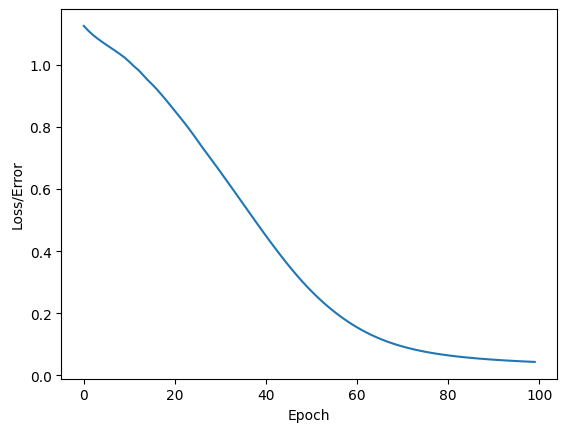

In [83]:
plt.plot(range(epoch), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')

In [84]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # Basically turn off back propagation
  Y_eval = model.forward(X_test) # X_test are features from our test set, Y_eval will be predictions
  loss = criterion(Y_eval, Y_test)

In [85]:
loss

tensor(0.1296)

In [98]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    Y_val =model.forward(data)

    if Y_test[i] == 0.0:
      x = 'setosa'
    elif Y_test[i] == 1.0:
      x = 'versicolor'
    elif Y_test[i] == 2.0:
      x = 'virginica'

    print(f'{i+1}.) \t {str(Y_val)} \t {Y_test[i]} \t {Y_val.argmax().item()}')

    # Correct or not
    if Y_val.argmax().item() == Y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(Y_test)} = {100*correct/len(Y_test)}% correct')

1.) 	 tensor([0.0000, 7.4818, 9.9517]) 	 2 	 2
2.) 	 tensor([ 0.0000,  7.7416, 14.4150]) 	 2 	 2
3.) 	 tensor([ 0.0000,  9.1741, 15.2260]) 	 2 	 2
4.) 	 tensor([0.2420, 8.3711, 4.5725]) 	 1 	 1
5.) 	 tensor([ 0.0000,  8.4455, 12.5213]) 	 2 	 2
6.) 	 tensor([1.6580, 8.0895, 2.0248]) 	 1 	 1
7.) 	 tensor([0.0000, 8.1067, 9.3146]) 	 2 	 2
8.) 	 tensor([0.3616, 8.4538, 4.3424]) 	 1 	 1
9.) 	 tensor([ 0.0000,  8.2779, 10.8831]) 	 2 	 2
10.) 	 tensor([ 0.0000,  8.2340, 15.2944]) 	 2 	 2
11.) 	 tensor([0.0000, 8.0207, 8.7722]) 	 2 	 2
12.) 	 tensor([9.0044, 3.5022, 0.0000]) 	 0 	 0
13.) 	 tensor([8.0835, 3.2078, 0.0000]) 	 0 	 0
14.) 	 tensor([2.2655, 6.5108, 0.4715]) 	 1 	 1
15.) 	 tensor([8.0545, 3.9531, 0.0000]) 	 0 	 0
16.) 	 tensor([0.0000, 8.1667, 8.0483]) 	 2 	 1
17.) 	 tensor([8.3930, 3.3382, 0.0000]) 	 0 	 0
18.) 	 tensor([0.0000, 7.6729, 9.5912]) 	 1 	 2
19.) 	 tensor([8.6390, 3.3854, 0.0000]) 	 0 	 0
20.) 	 tensor([7.5293, 3.3366, 0.0000]) 	 0 	 0
21.) 	 tensor([2.0055, 7.1311, 1.1